In [1]:
N = (16 + 4 ) % 5 + 1
print(N)

1


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'NationalNames.csv'
data = pd.read_csv(file_path)

# 1

In [5]:
data.head(8)


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


# 2

In [6]:
data.tail(8)


,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


# 3

In [7]:
data.columns


Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

# 5

In [8]:
unique_names = data['Name'].nunique()
unique_names


93889

# 10

In [9]:
unique_names_per_year = data.groupby('Year')['Name'].nunique()

unique_names_table = unique_names_per_year.reset_index()
unique_names_table.columns = ['Year', 'Name']

unique_names_table.head()


,Year,Name
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158


# 11

In [10]:
unique_names_per_year = data.groupby('Year')['Name'].nunique()

unique_names_table = unique_names_per_year.reset_index()
unique_names_table.columns = ['Year', 'Name']

year_most_unique_names = unique_names_per_year.idxmax()
most_unique_names_count = unique_names_per_year.max()

result_table = pd.DataFrame({'Year': [year_most_unique_names], 'Name': [most_unique_names_count]})

result_table


,Year,Name
0,2008,32488


# 12

In [11]:
popular_name_2008 = data[data['Year'] == 2008]
most_popular_name_2008 = popular_name_2008.groupby('Name')['Count'].sum().idxmax()

most_popular_name_2008


'Jacob'

# 13

In [12]:
jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
most_popular_jacob_row = jacob_female.loc[jacob_female['Count'].idxmax()]

most_popular_jacob_row_df = most_popular_jacob_row.to_frame().T

most_popular_jacob_row_df


,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


# 14

In [13]:
gender_neutral_names = data.groupby('Name').filter(lambda x: len(x['Gender'].unique()) > 1)
neutral_names_by_year = gender_neutral_names.groupby('Year')['Name'].nunique()
year_most_neutral_names = neutral_names_by_year.idxmax()
most_neutral_names_count = neutral_names_by_year.max()

result_table = pd.DataFrame({'Year': [year_most_neutral_names], 'Name': [most_neutral_names_count]})

result_table


,Year,Name
0,2009,7372


# 15

In [14]:
total_births_per_year = data.groupby('Year')['Count'].sum().reset_index()

total_births_per_year.columns = ['Year', 'Count']

total_births_per_year.head()


,Year,Count
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467


# 16

In [21]:
total_births_per_year = data.groupby('Year')['Count'].sum()

year_most_births = total_births_per_year.idxmax()

year_most_births

np.int64(1957)

# 17

In [22]:
gender_counts_by_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

gender_counts_table = gender_counts_by_year.reset_index()
gender_counts_table.columns = ['Year', 'F', 'M']


gender_counts_table.head()


,Year,F,M
0,1880,90993,110491
1,1881,91954,100745
2,1882,107850,113688
3,1883,112321,104629
4,1884,129022,114445


# 18

In [23]:
more_girls_than_boys = (gender_counts_by_year['F'] > gender_counts_by_year['M']).sum()
more_girls_than_boys


np.int64(54)

# 21

In [24]:
barbara_count = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()
barbara_count


np.int64(4139)

# 22

In [25]:
import pandas as pd

unique_years = data['Year'].nunique()

result_string = f"'Спостереження проводилось {unique_years} років'"

print(result_string)

'Спостереження проводилось 135 років'


# 23

In [26]:
years_of_observation = data['Year'].nunique()

gender_neutral_names = data.groupby('Name').filter(lambda x: len(x['Gender'].unique()) > 1)

neutral_names_each_year = gender_neutral_names.groupby('Name').filter(lambda x: len(x['Year'].unique()) == years_of_observation)
neutral_names = neutral_names_each_year['Name'].unique()

neutral_names_df = pd.DataFrame(neutral_names, columns=['0'])

neutral_names_df.head(16)


,0
0,Mary
1,Anna
2,Emma
3,Elizabeth
4,Minnie
5,Margaret
6,Ida
7,Alice
8,Bertha
9,Sarah


# 24

In [28]:
min_count = data['Count'].min()

rare_names = data[data['Count'] == min_count]

most_popular_rare_name_row = rare_names.loc[rare_names['Count'].idxmax()]

most_popular_rare_name = most_popular_rare_name_row['Name']
most_popular_rare_name_count = most_popular_rare_name_row['Count']

print(f"Наиболее популярное из непопулярных имен - это {most_popular_rare_name}. Им называли {most_popular_rare_name_count} раз.")


Наиболее популярное из непопулярных имен - это Adelle. Им называли 5 раз.


# 26

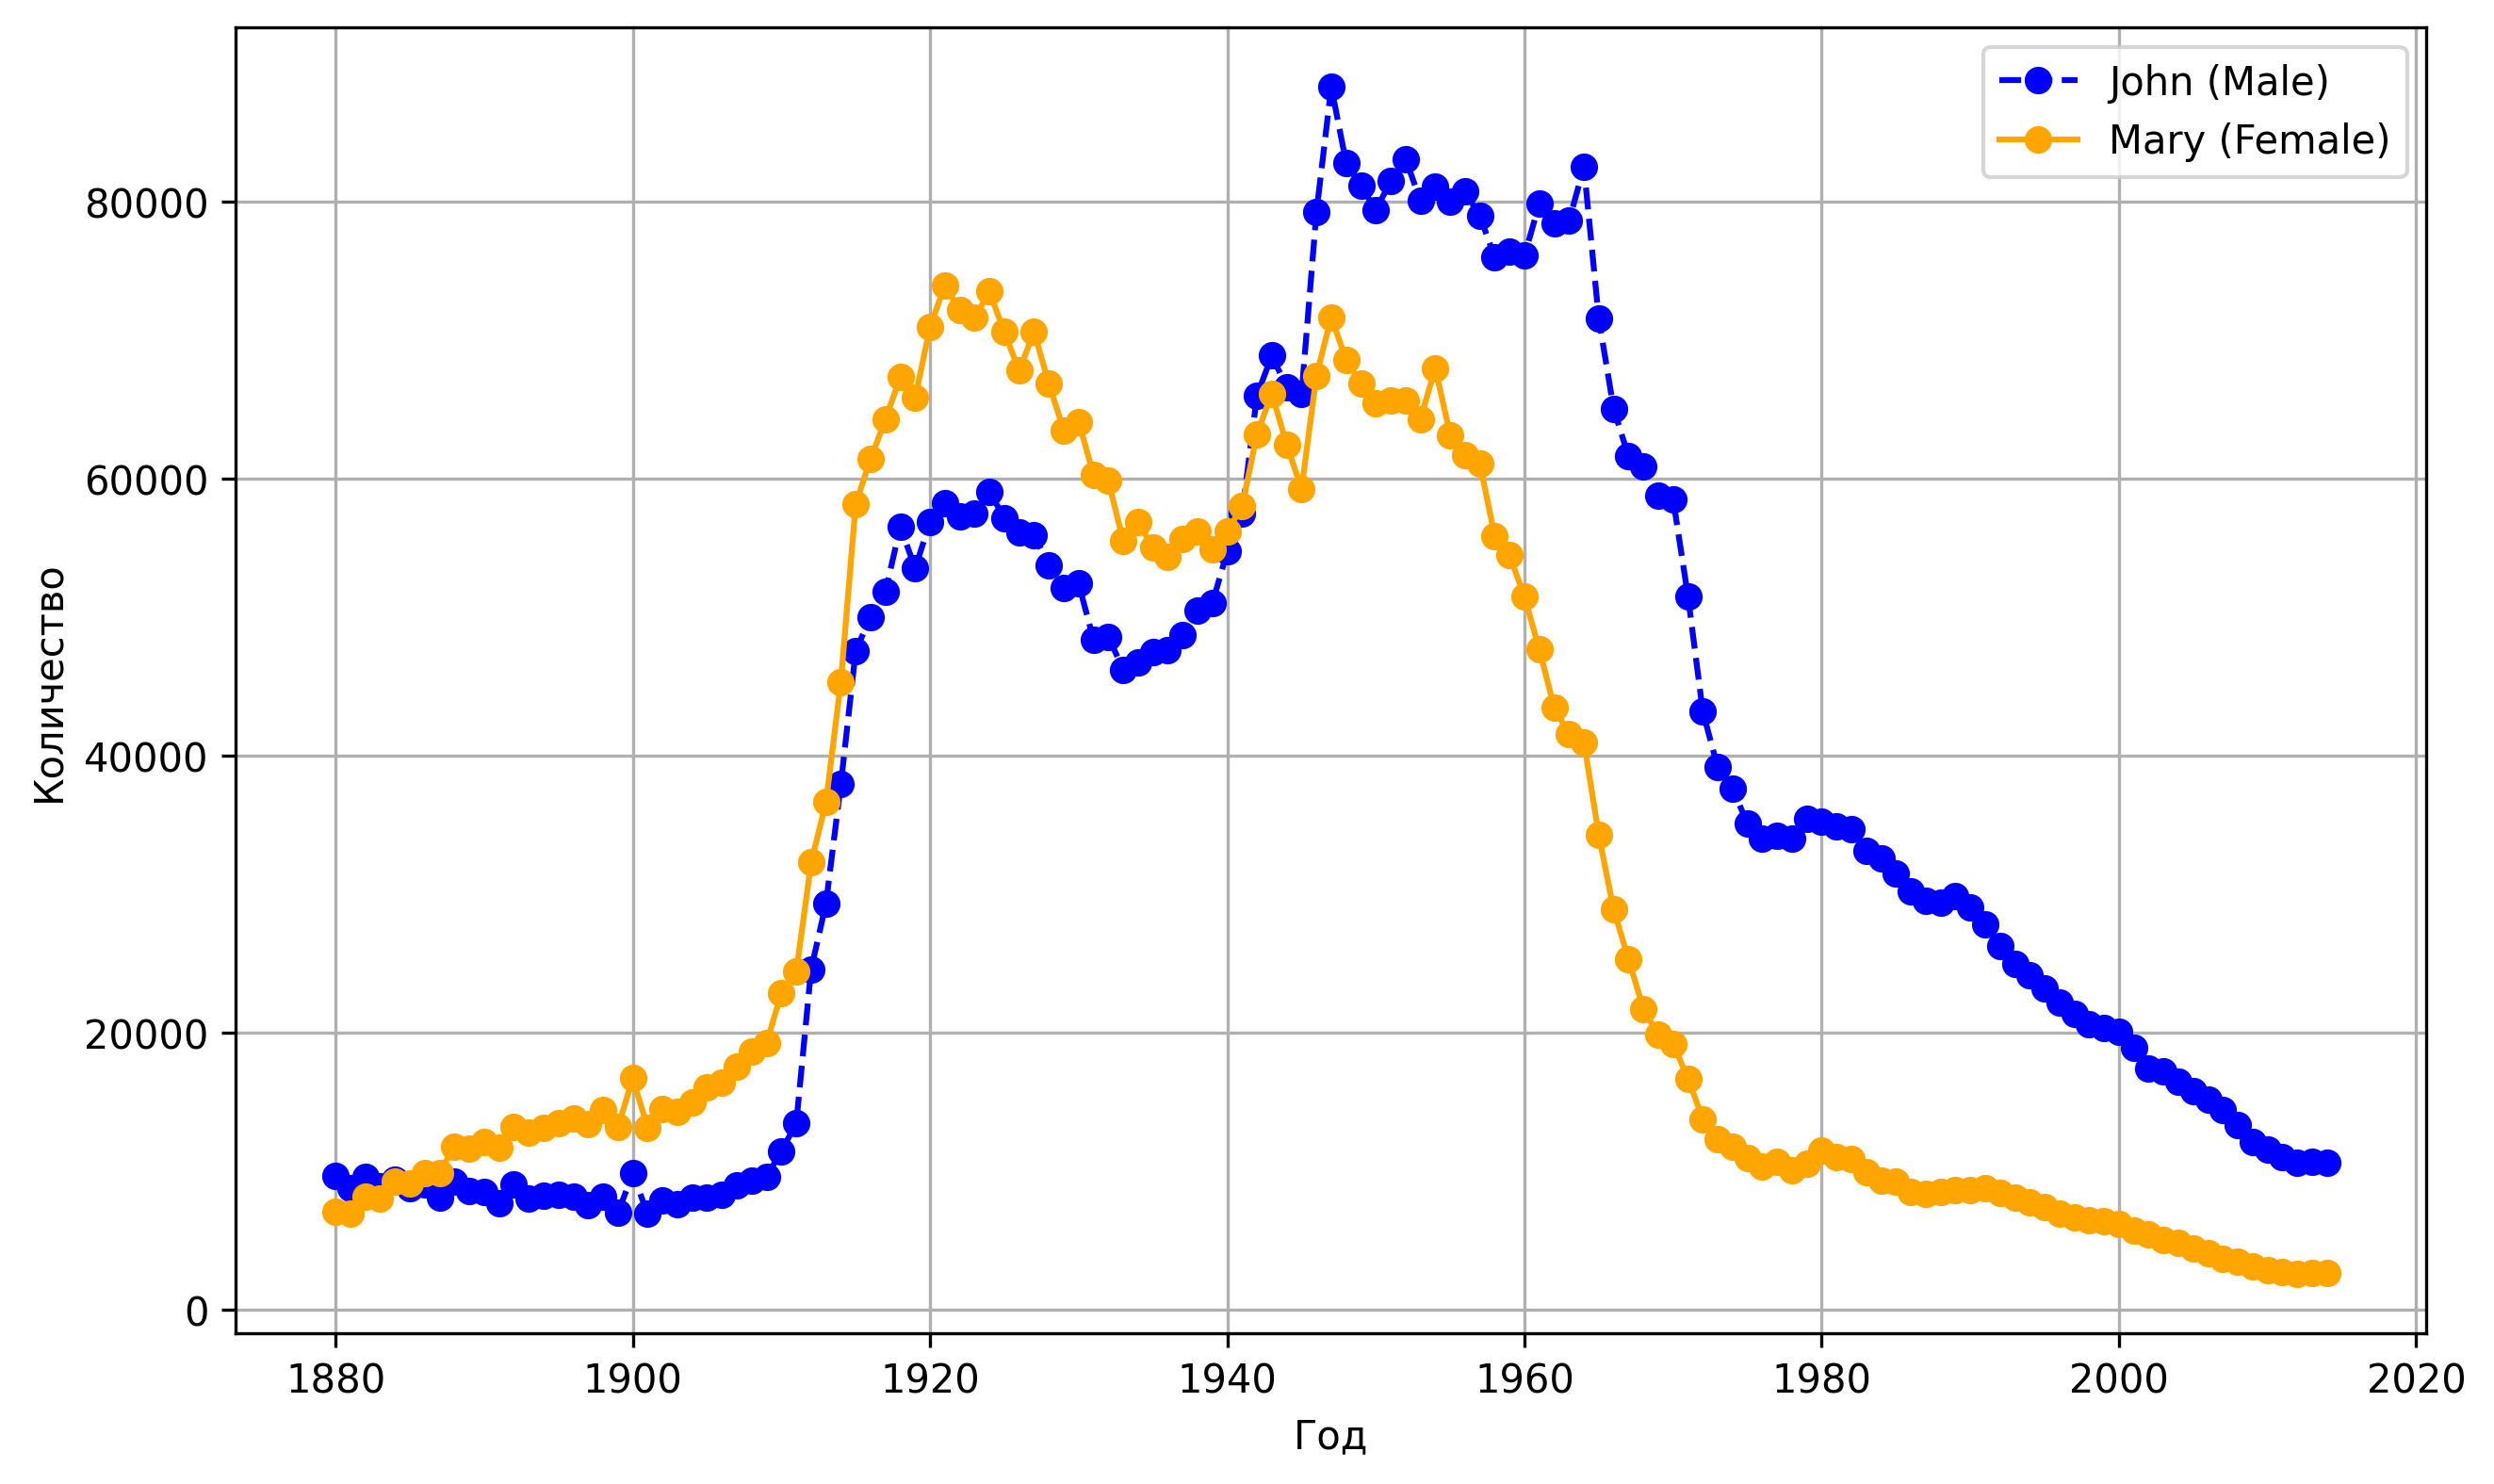

In [29]:
john_male = data[(data['Name'] == 'John') & (data['Gender'] == 'M')]
mary_female = data[(data['Name'] == 'Mary') & (data['Gender'] == 'F')]

plt.figure(figsize=(10, 6), dpi=300)
john_male_grouped = john_male.groupby('Year')['Count'].sum()
mary_female_grouped = mary_female.groupby('Year')['Count'].sum()

plt.plot(john_male_grouped, marker='o', color='blue', label="John (Male)", linestyle='--')
plt.plot(mary_female_grouped, marker='o', color='orange', label="Mary (Female)", linestyle='-')

plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid(True)
plt.legend()
plt.savefig('john_mary_distribution.png')
plt.show()
